In [1]:
import tensorflow as tf
print(tf.__version__)

2023-04-19 11:57:22.501774: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-19 11:57:23.872227: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


2.12.0


In [3]:
pwd

'/home/jovyan/Desktop/TFOD/notebooks'

In [4]:
import tensorflow as tf

if tf.test.gpu_device_name():
    print(f"Default GPU Device: {tf.test.gpu_device_name()}")
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


2023-04-18 08:36:21.728394: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /device:GPU:0 with 7894 MB memory:  -> device: 0, name: NVIDIA A100 80GB PCIe MIG 1g.10gb, pci bus id: 0000:a3:00.0, compute capability: 8.0
2023-04-18 08:36:21.731956: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /device:GPU:0 with 7894 MB memory:  -> device: 0, name: NVIDIA A100 80GB PCIe MIG 1g.10gb, pci bus id: 0000:a3:00.0, compute capability: 8.0


In [7]:
directory_path='/home/jovyan/Desktop'
%cd {directory_path}

/home/jovyan/Desktop


In [6]:
#!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 84774, done.
remote: Counting objects: 100% (402/402), done.
remote: Compressing objects: 100% (171/171), done.
remote: Total 84774 (delta 238), reused 384 (delta 230), pack-reused 84372
Receiving objects: 100% (84774/84774), 597.44 MiB | 25.61 MiB/s, done.
Resolving deltas: 100% (60732/60732), done.
Updating files: 100% (3370/3370), done.


In [9]:
%cd models/research
!protoc object_detection/protos/*.proto --python_out=.
!git clone https://github.com/cocodataset/cocoapi.git
%cd cocoapi/PythonAPI
!make
%cp -r pycocotools {'/home/jovyan/Desktop/models/research'}

/home/jovyan/Desktop/models/research
fatal: destination path 'cocoapi' already exists and is not an empty directory.
/home/jovyan/Desktop/models/research/cocoapi/PythonAPI
python setup.py build_ext --inplace
running build_ext
skipping 'pycocotools/_mask.c' Cython extension (up-to-date)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-cpython-310
creating build/temp.linux-x86_64-cpython-310/pycocotools
gcc -pthread -B /opt/conda/compiler_compat -Wno-unused-result -Wsign-compare -DNDEBUG -fwrapv -O2 -Wall -fPIC -O2 -isystem /opt/conda/include -fPIC -O2 -isystem /opt/conda/include -fPIC -I/opt/conda/lib/python3.10/site-packages/numpy/core/include -I../common -I/opt/conda/include/python3.10 -c ../common/maskApi.c -o build/temp.linux-x86_64-cpython-310/../common/maskApi.o -Wno-cpp -Wno-unused-function -std=c99
../common/maskApi.c: In function ‘rleDecode’:
../common/maskApi.c:46:7: warning: this ‘for’ clause does not guard... []8;;

In [12]:
pwd

'/home/jovyan/Desktop/models/research'

### Install the Object Detection API

In [11]:
%cd ../..
%cp object_detection/packages/tf2/setup.py .
!python -m pip install --user . 
!python object_detection/builders/model_builder_tf2_test.py


/home/jovyan/Desktop/models/research
Processing /home/jovyan/Desktop/models/research
  Preparing metadata (setup.py) ... done
  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1655312 sha256=0a6f611c8143e6ec94f3aeeafddb82e248684146daa15f4bf108b41c3eec1ab3
  Stored in directory: /tmp/pip-ephem-wheel-cache-a3gv3h6f/wheels/bf/6f/6f/b73d406de82cfb262c5b34c4c06700d18959089a04b047bb9e
Successfully built object-detection
  Attempting uninstall: object-detection
    Found existing installation: object-detection 0.1
    Uninstalling object-detection-0.1:
      Successfully uninstalled object-detection-0.1
2023-04-15 17:53:16.559100: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/jovyan/.local/lib/python3.10/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and rel

Télécharger le model Tensorflow pré-entrainé (retina50)

In [4]:
%cd /home/jovyan/Desktop/TFOD/pretrained_models

/home/jovyan/Desktop/TFOD/pretrained_models


In [14]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz
!tar -xvf ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz
!rm ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz

--2023-04-15 17:54:33--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 209.85.202.128, 2a00:1450:400b:c00::80
Connecting to download.tensorflow.org (download.tensorflow.org)|209.85.202.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 244817203 (233M) [application/x-tar]
Saving to: ‘ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz’

ssd_resnet50_v1_fpn 100%[===================>] 233.48M  68.5MB/s    in 3.6s    

2023-04-15 17:54:39 (65.5 MB/s) - ‘ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz’ saved [244817203/244817203]

ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/checkpoint/
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/checkpoint/checkpoint
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0.index
ssd_resnet

In [5]:
pwd

'/home/jovyan/Desktop/TFOD/notebooks'

### Training

In [2]:
%cd ..

/home/jovyan/Desktop/TFOD


In [63]:
print(tf.__version__)

2.12.0


In [13]:
!python model_main_train_.py --model_dir=models/retina50 --pipeline_config_path=models/retina50/pipeline.config

2023-04-18 08:55:46.354123: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/jovyan/.local/lib/python3.10/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
I0418 08:55:49.296586 140143647467328 mirrored_strategy.py:374] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: None
I0418 08:55:49.302660 140143647467328 config_u

#### Exporter le modèle

In [3]:
!python exporter_main_v2.py --input_type image_tensor --pipeline_config_path models/retina50/pipeline.config --trained_checkpoint_dir models/retina50 --output_directory exported_models/retina50


2023-04-18 11:57:10.568202: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-18 11:57:11.678008: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/jovyan/.local/lib/python3.10/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
2023-04-18 11:57:15.474212: I tensorfl

#### Tester model avec qlqs images de validation

In [55]:
pwd

'/home/jovyan/Desktop/TFOD'

In [57]:
import os
import random
import time
import cv2
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils


In [58]:
PATH_TO_SAVED_MODEL = '/home/jovyan/Desktop/TFOD/exported_models/retina50/saved_model'
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

PATH_TO_LABELS = '/home/jovyan/Desktop/dataset/coco_organized/val/label_map.pbtxt'
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)


In [56]:
def read_labels(txt_file_path, img_height, img_width):
    with open(txt_file_path, "r") as f:
        lines = f.readlines()
    
    boxes = []
    for line in lines:
        class_id, x_center, y_center, width, height = map(float, line.strip().split(" "))
        x_min = int((x_center - width / 2) * img_width)
        x_max = int((x_center + width / 2) * img_width)
        y_min = int((y_center - height / 2) * img_height)
        y_max = int((y_center + height / 2) * img_height)
        boxes.append((int(class_id), x_min, y_min, x_max, y_max))
    
    return boxes

def draw_boxes(image, boxes, category_index):
    for box in boxes:
        class_id, x_min, y_min, x_max, y_max = box
        class_name = category_index[class_id+1]['name']
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
        cv2.putText(image, class_name, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    return image


Running inference for /home/jovyan/Desktop/dataset/coco_organized/val/images/000000527407.jpg... 
FPS: 14.142473236112282


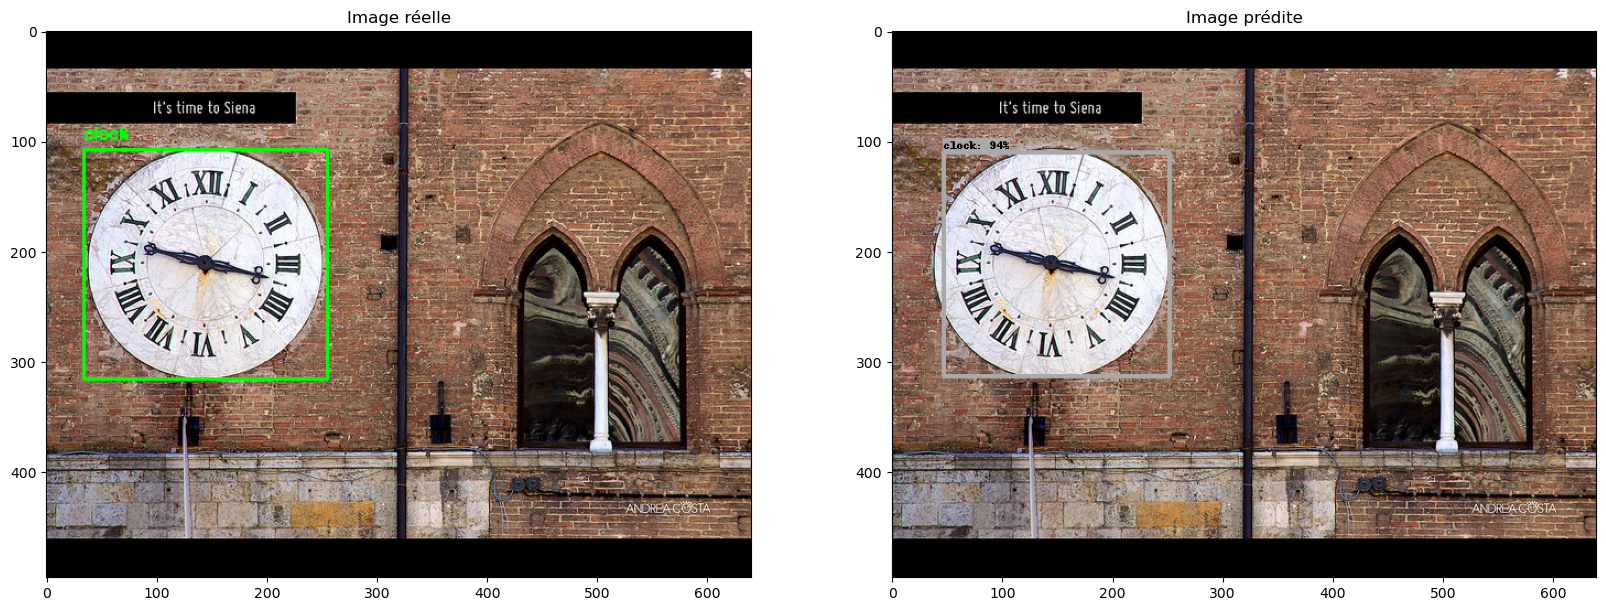

Running inference for /home/jovyan/Desktop/dataset/coco_organized/val/images/000000090122.jpg... 
FPS: 14.470602035535622


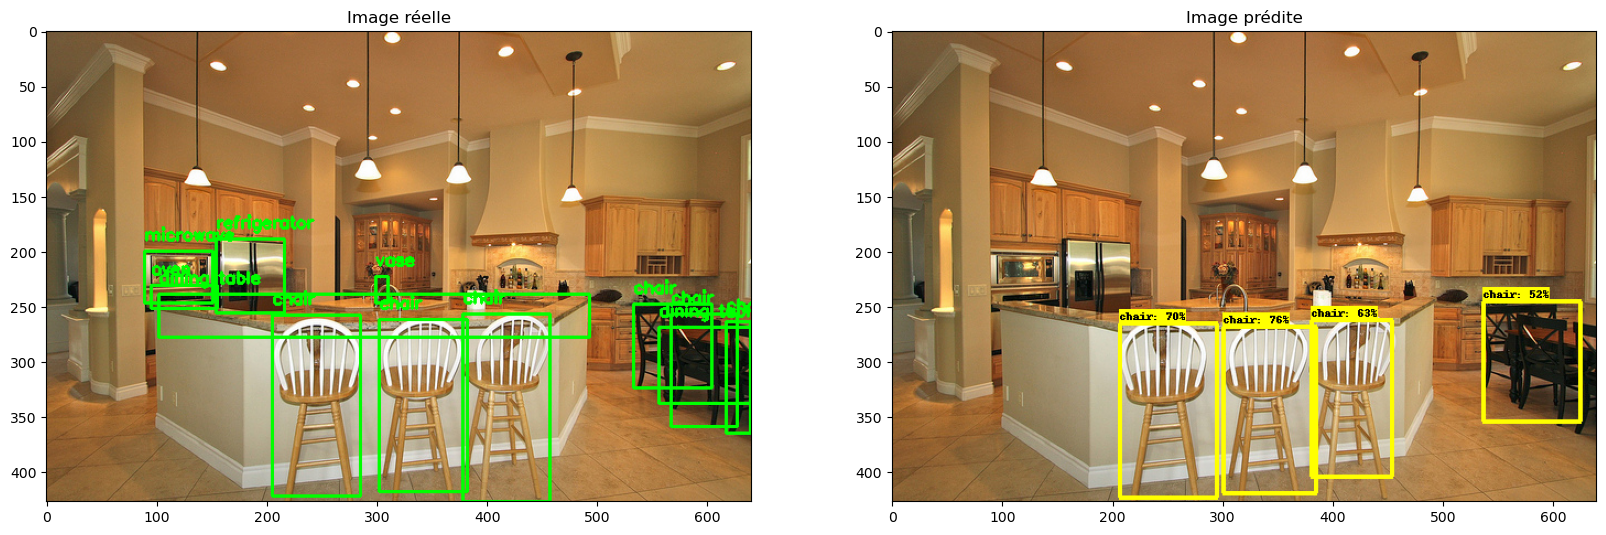

Running inference for /home/jovyan/Desktop/dataset/coco_organized/val/images/000000514089.jpg... 
FPS: 18.244274609934013


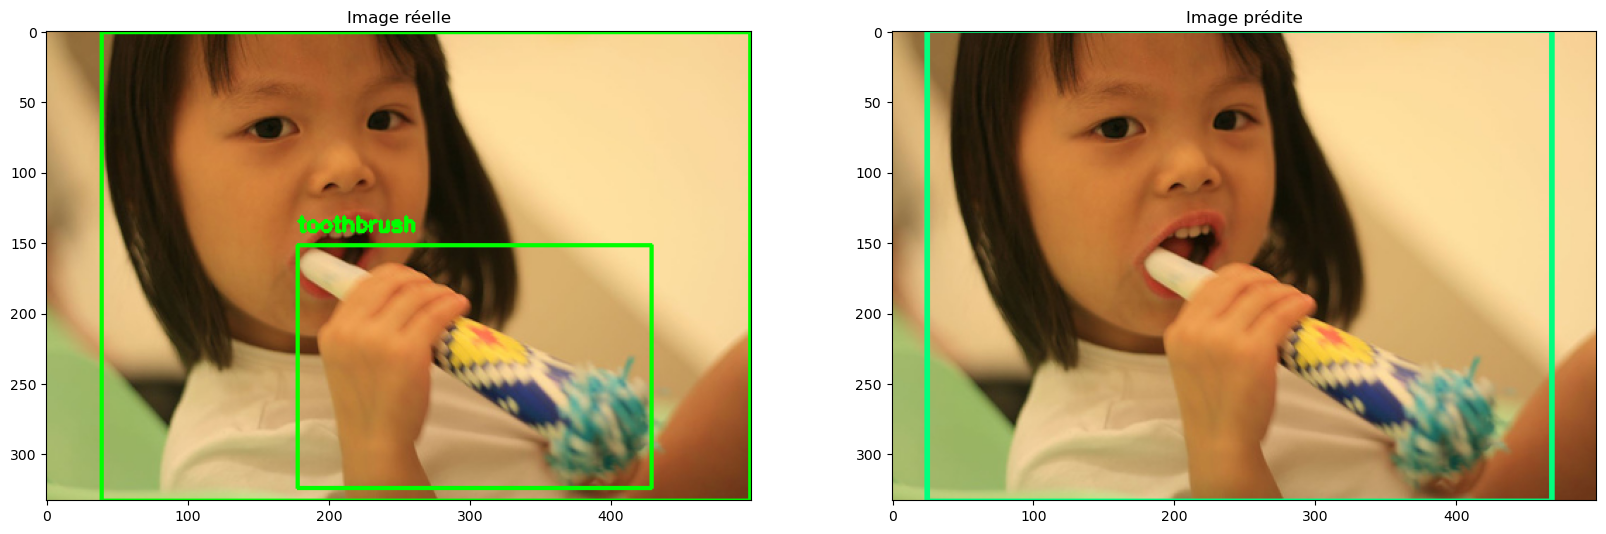

Running inference for /home/jovyan/Desktop/dataset/coco_organized/val/images/000000462527.jpg... 
FPS: 17.7568244936666


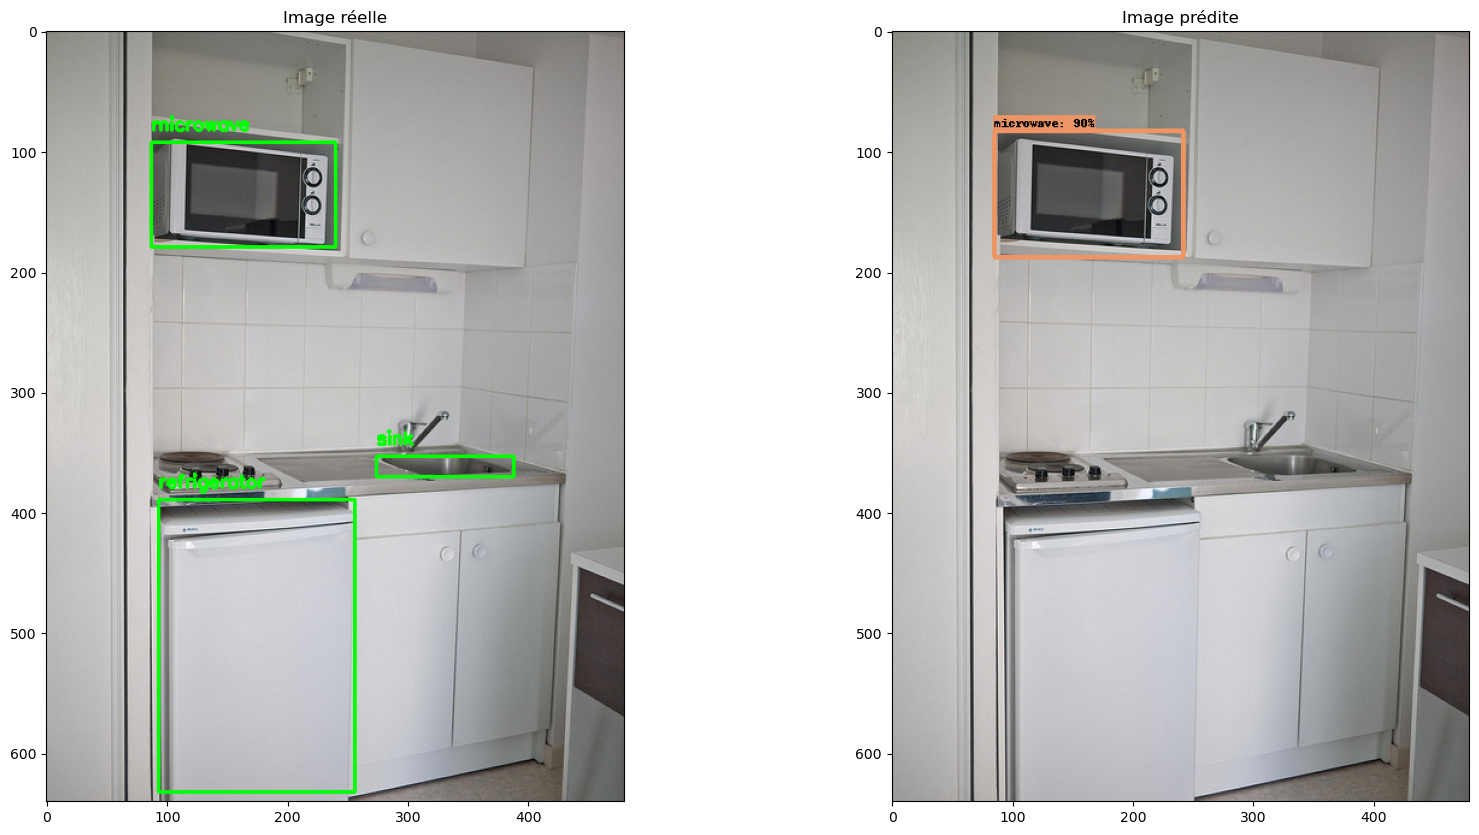

Running inference for /home/jovyan/Desktop/dataset/coco_organized/val/images/000000253964.jpg... 
FPS: 17.962065701964377


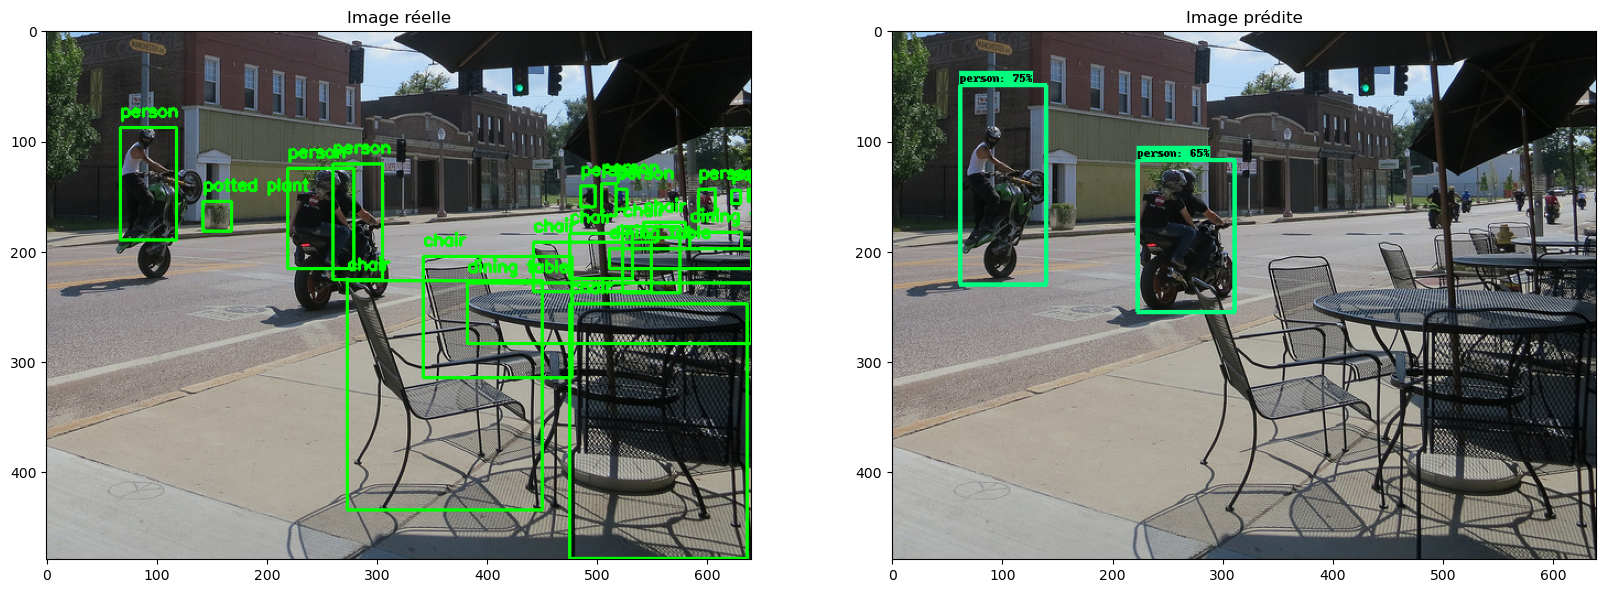

Running inference for /home/jovyan/Desktop/dataset/coco_organized/val/images/000000084015.jpg... 
FPS: 19.78706621629272


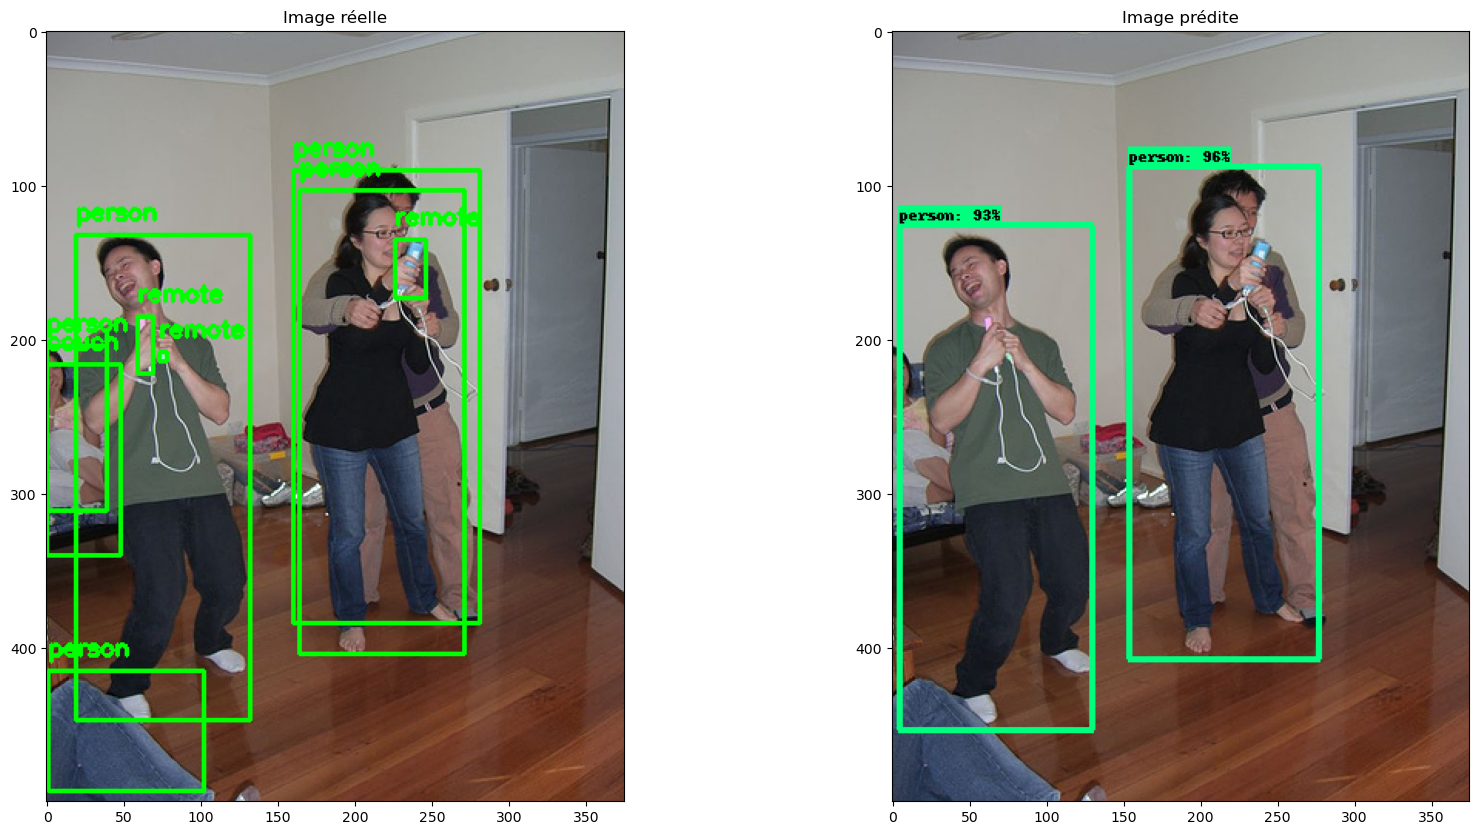

Running inference for /home/jovyan/Desktop/dataset/coco_organized/val/images/000000171075.jpg... 
FPS: 20.281247733393936


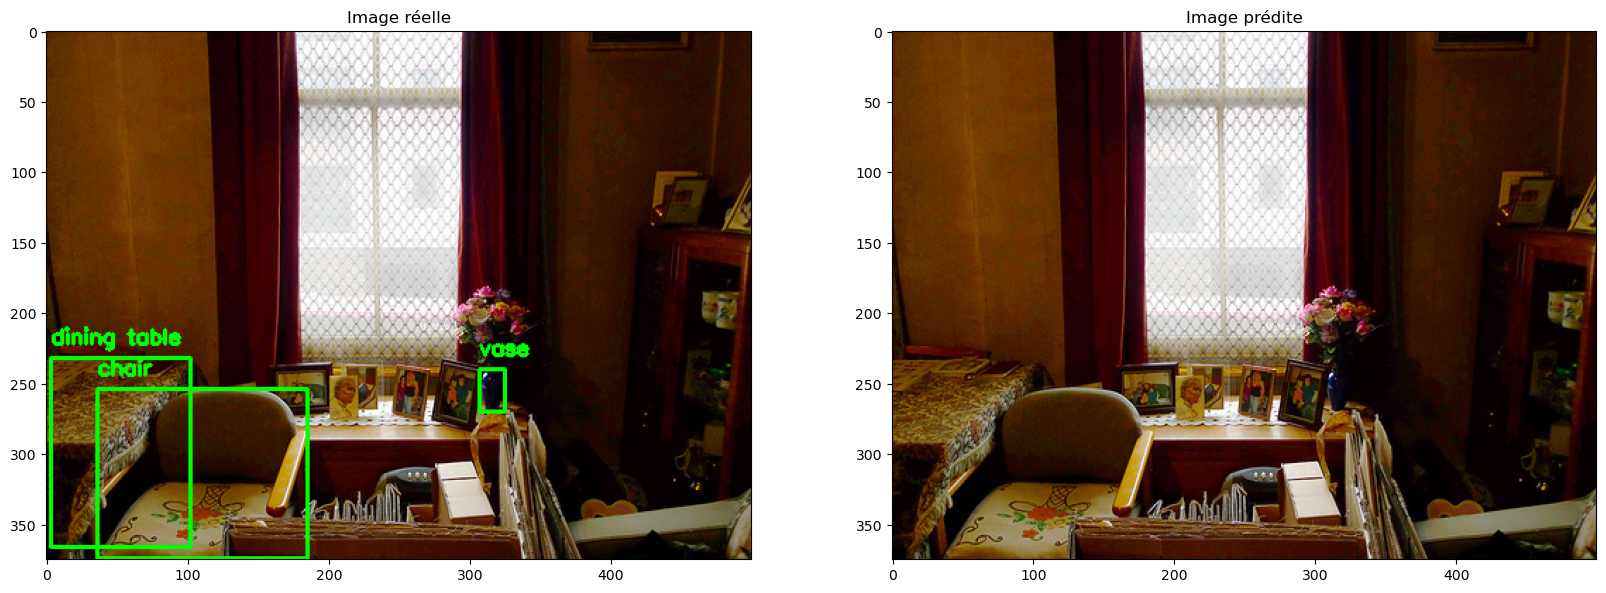

Running inference for /home/jovyan/Desktop/dataset/coco_organized/val/images/000000399791.jpg... 
FPS: 16.732706999381644


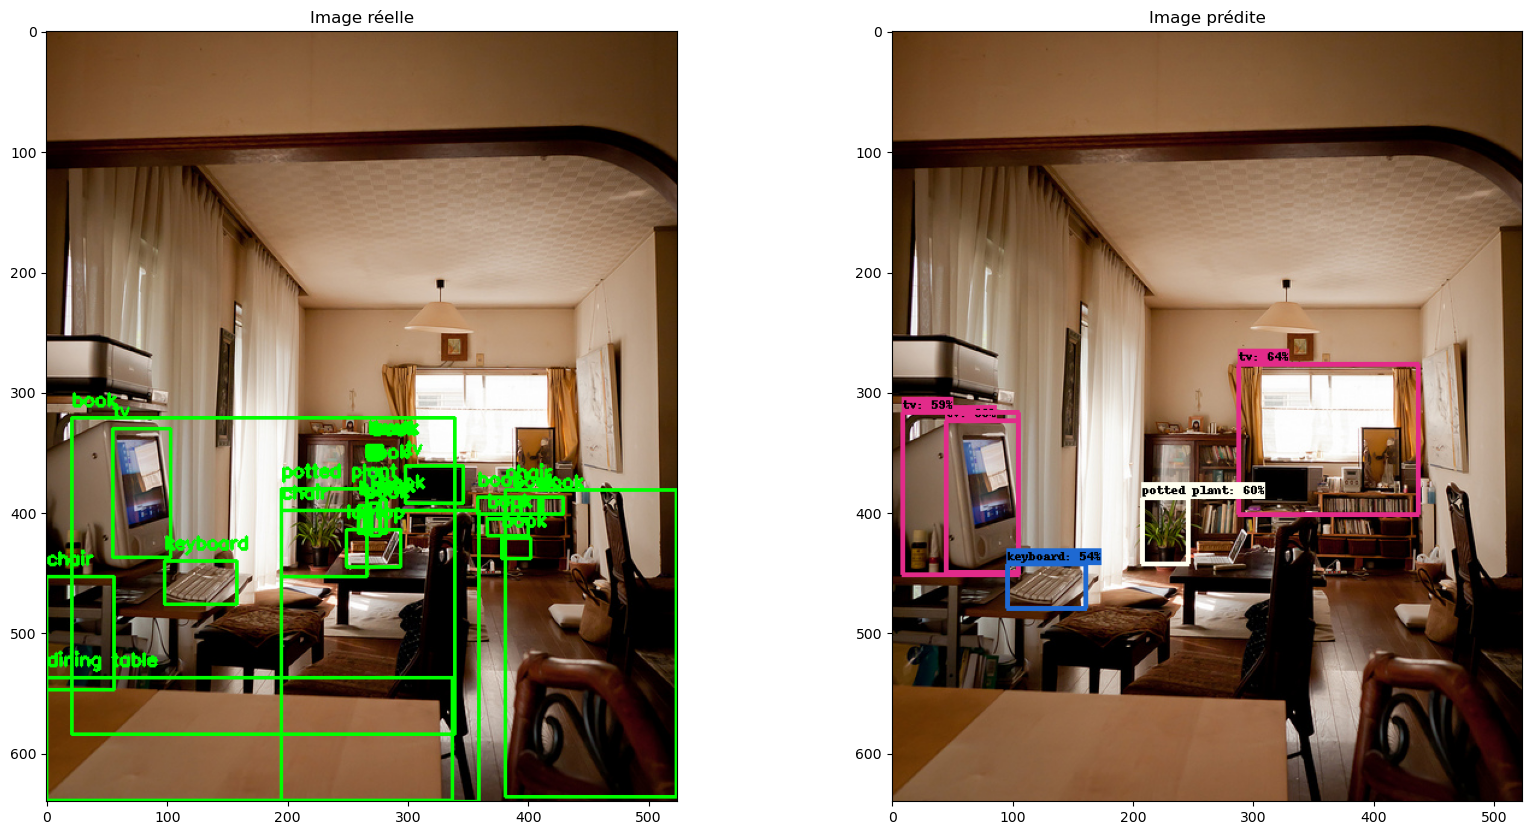

Running inference for /home/jovyan/Desktop/dataset/coco_organized/val/images/000000349069.jpg... 
FPS: 19.99973297475658


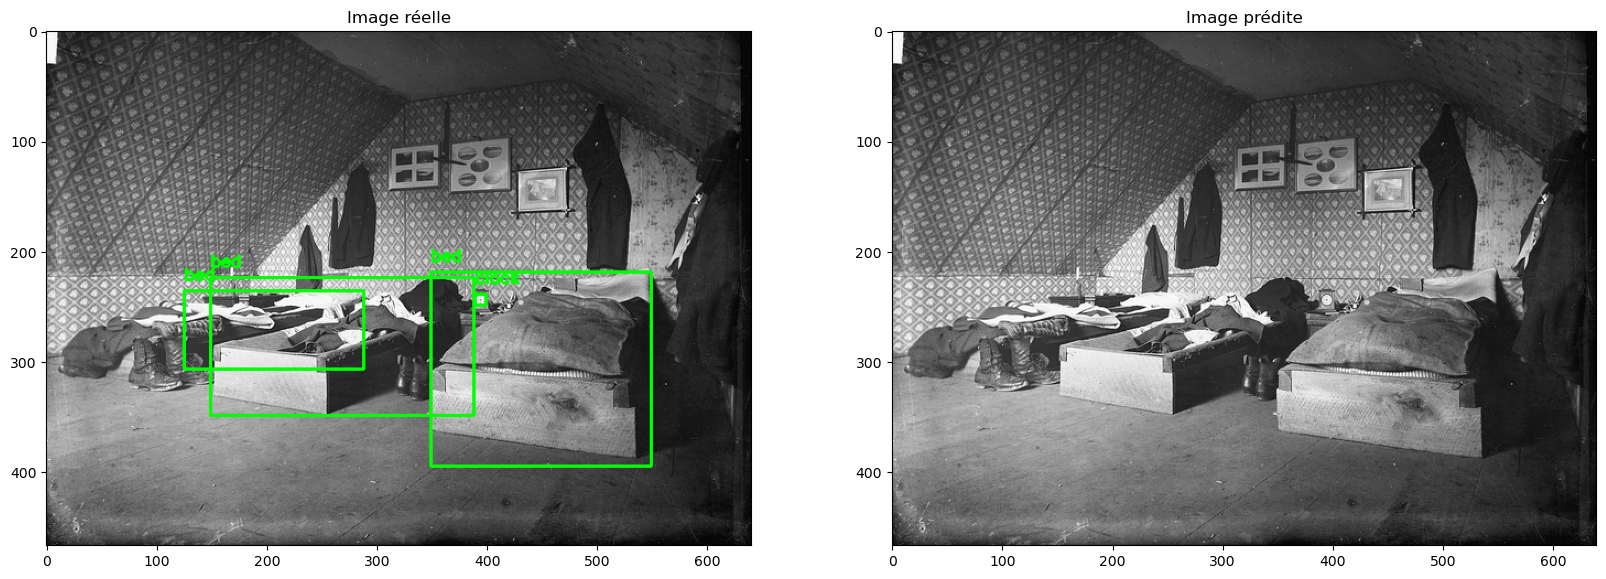

Running inference for /home/jovyan/Desktop/dataset/coco_organized/val/images/000000517626.jpg... 
FPS: 19.5923187234619


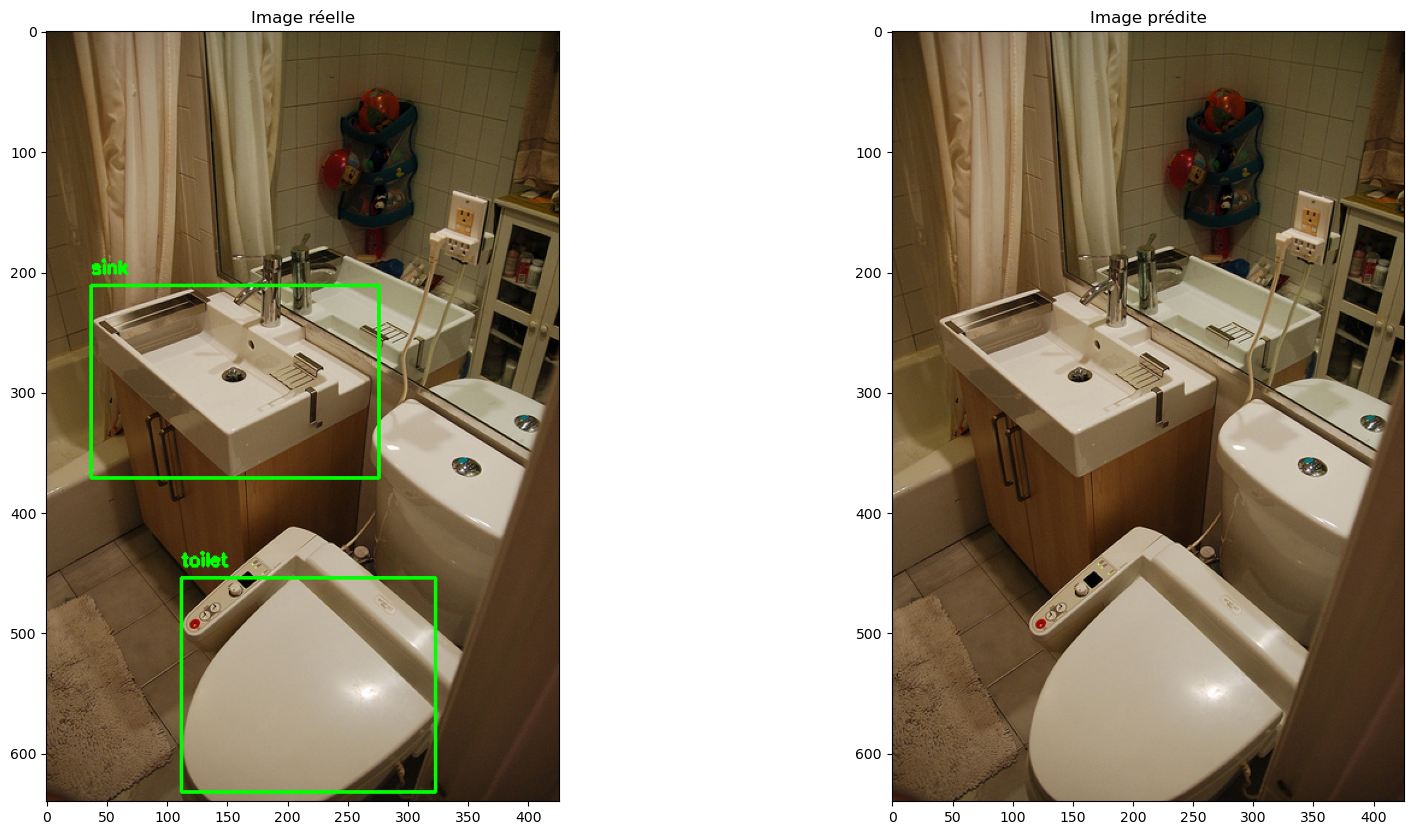

In [62]:
image_dir = '/home/jovyan/Desktop/dataset/coco_organized/val/images'
label_dir = '/home/jovyan/Desktop/dataset/coco_organized/val/labels'
all_image_paths = [os.path.join(image_dir, f) for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f))]

selected_image_paths = random.sample(all_image_paths, 10)

for image_path in selected_image_paths:
    print(f'Running inference for {image_path}... ', end='')
    
    start_time = time.time()

    image = cv2.imread(image_path)
    img_height, img_width, _ = image.shape
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_expanded = np.expand_dims(image_rgb, axis=0)

    input_tensor = tf.convert_to_tensor(image)
    input_tensor = input_tensor[tf.newaxis, ...]

    detections = detect_fn(input_tensor)

    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                   for key, value in detections.items()}
    detections['num_detections'] = num_detections
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    image_with_detections = image.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
          image_with_detections,
          detections['detection_boxes'],
          detections['detection_classes'],
          detections['detection_scores'],
          category_index,
          use_normalized_coordinates=True,
          max_boxes_to_draw=200,
          min_score_thresh=0.5,
          agnostic_mode=False)

    end_time = time.time()
    elapsed_time = end_time - start_time
    fps = 1 / elapsed_time
    print()
    print(f'FPS: {fps}')

    txt_file_path = os.path.join(label_dir, os.path.splitext(os.path.basename(image_path))[0] + '.txt')
    boxes = read_labels(txt_file_path, img_height, img_width)

    image_with_real_boxes = draw_boxes(image.copy(), boxes, category_index)

    plt.figure(figsize=(20,10))

    plt.subplot(1, 2, 1)
    plt.title('Image réelle')
    plt.imshow(cv2.cvtColor(image_with_real_boxes, cv2.COLOR_BGR2RGB))

    plt.subplot(1, 2, 2)
    plt.title('Image prédite')
    plt.imshow(cv2.cvtColor(image_with_detections, cv2.COLOR_BGR2RGB))

    plt.show()


#### Évaluer le modèle

In [7]:
pwd

'/home/jovyan/Desktop/TFOD'

In [8]:
!python model_main_train_.py --model_dir=models/retina50 --pipeline_config_path=models/retina50/pipeline.config --checkpoint_dir=models/retina50 > output.txt 2>&1


In [9]:
!python extract_metrics.py
!rm output.txt

In [11]:
import pandas as pd
csv_file = 'models/retina50/eval/metrics.csv'

# Charger le fichier CSV
data = pd.read_csv(csv_file)

# Afficher le contenu du fichier CSV
display(data)


Number of Images       596
0                                    Step     25000
1                                  Metric     Value
2            DetectionBoxes_Precision/mAP  0.196074
3     DetectionBoxes_Precision/mAP@.50IOU  0.332367
4     DetectionBoxes_Precision/mAP@.75IOU  0.208736
5    DetectionBoxes_Precision/mAP (small)  0.023260
6   DetectionBoxes_Precision/mAP (medium)  0.142939
7    DetectionBoxes_Precision/mAP (large)  0.312472
8              DetectionBoxes_Recall/AR@1  0.230471
9             DetectionBoxes_Recall/AR@10  0.352564
10           DetectionBoxes_Recall/AR@100  0.371313
11                 Loss/localization_loss  0.305028
12               Loss/classification_loss  0.523627
13               Loss/regularization_loss  0.279749
14                        Loss/total_loss  1.108404

#### Sort

In [2]:
cd /home/jovyan/Desktop/TFOD

/home/jovyan/Desktop/TFOD


In [4]:
import cv2
import numpy as np
import tensorflow as tf
from sort import Sort

# Remplacez par le chemin de votre modèle TensorFlow SavedModel
saved_model_path = "/home/jovyan/Desktop/TFOD/exported_models/retina50/saved_model"

# Remplacez par le chemin de votre fichier vidéo de test
input_video_path = "/home/jovyan/Desktop/TFOD/videos/video_2.mp4"

# Remplacez par le chemin de votre fichier vidéo de sortie
output_video_path = "/home/jovyan/Desktop/TFOD/outputs_videos/video_2_out.mp4"

# Charger le modèle TensorFlow SavedModel
model = tf.saved_model.load(saved_model_path)

# Créer une instance de la classe SORT
tracker = Sort()

# Ouvrir la vidéo d'entrée
cap = cv2.VideoCapture(input_video_path)

# Obtenir les dimensions et le FPS de la vidéo d'entrée
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Créer la vidéo de sortie
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Prétraiter l'image
    input_tensor = tf.convert_to_tensor(frame)
    input_tensor = input_tensor[tf.newaxis, ...]

    # Effectuer l'inférence avec le modèle TensorFlow
    detections = model(input_tensor)

    # Extraire les boîtes englobantes détectées et leurs scores
    boxes = detections['detection_boxes'][0].numpy()
    scores = detections['detection_scores'][0].numpy()
    classes = detections['detection_classes'][0].numpy().astype(np.int32)

    # Filtrer les détections avec un seuil de score
    score_threshold = 0.5
    valid_indices = np.where(scores >= score_threshold)
    boxes = boxes[valid_indices]
    scores = scores[valid_indices]
    classes = classes[valid_indices]

    # Convertir les coordonnées normalisées des boîtes englobantes en coordonnées entières
    boxes[:, [0, 1]] = boxes[:, [0, 1]] * np.array([height, width])
    boxes[:, [2, 3]] = boxes[:, [2, 3]] * np.array([height, width])
    boxes = boxes.astype(np.int32)

    # Mettre à jour le tracker SORT avec les nouvelles détections
    tracked_objects = tracker.update(boxes)

    # Dessiner les boîtes englobantes et les ID des objets suivis sur l'image
    for obj in tracked_objects:
        bbox = obj[:4]
        track_id = int(obj[4])
        x1, y1, x2, y2 = [int(v) for v in bbox]
        cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 0), 2)
        cv2.putText(frame, f"ID: {track_id}", (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Enregistrer le cadre avec les objets suivis dans la vidéo de sortie
    out.write(frame)

    # Afficher le cadre avec les objets suivis (facultatif, vous pouvez commenter cette partie si vous ne voulez pas afficher la vidéo en temps réel)
   # cv2.imshow('frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Libérer les ressources et fermer les fenêtres
cap.release()
out.release()
cv2.destroyAllWindows()
    

2023-04-19 08:58:29.079754: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'input_tensor' with dtype uint8 and shape [1,?,?,3]
	 [[{{node input_tensor}}]]


In [1]:
!pip install filterpy
!pip install opencv-python-headless
!pip install sort_tracker


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 3.4 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110459 sha256=bb87581c2cf7560c765f5732c50f6c5702b4a64b4662e928a9b60e679bc1636b
  Stored in directory: /home/jovyan/.cache/pip/wheels/0f/0c/ea/218f266af4ad626897562199fbbcba521b8497303200186102
Successfully built filterpy
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for sort_tracker (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [96 lines of output]
      
      
      --------------------------------------------------------------------------------
      -- Trying 'Ninja' generator
      --------------------------------
      ---------------------------
      ----------------------
      -----------------
      ------

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from sort_tracker import Sort
import os

# Charger le modèle TensorFlow
model_directory = "exported_models/efficientdet1/saved_model"
model = tf.saved_model.load(model_directory)

# Initialiser le tracker SORT
tracker = Sort()


# Fonction pour effectuer la détection d'objets
def object_detection(frame, model):
    input_tensor = tf.convert_to_tensor(frame)
    input_tensor = input_tensor[tf.newaxis, ...]

    output_dict = model.signatures["serving_default"](input_tensor)

    boxes = output_dict["detection_boxes"][0].numpy()
    scores = output_dict["detection_scores"][0].numpy()
    classes = output_dict["detection_classes"][0].numpy()
    num_detections = int(output_dict["num_detections"][0])

    return boxes, scores, classes, num_detections

# Fonction pour dessiner les boxes et les ID de suivi
def draw_boxes(frame, tracked_objects):
    for obj in tracked_objects:
        x1, y1, x2, y2, obj_id = obj
        cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)
        cv2.putText(frame, str(int(obj_id)), (int(x1), int(y1-5)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)




In [ ]:
# Charger la vidéo input (de test)
input_video = "/content/drive/MyDrive/Colab Notebooks/PFE/TFOD/videos/video_1.mp4"
output_video = "/content/drive/MyDrive/Colab Notebooks/PFE/TFOD/outputs_videos/video_1_out.mp4"

cap = cv2.VideoCapture(input_video)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Créer la vidéo de sortie
out = cv2.VideoWriter(output_video, cv2.VideoWriter_fourcc(*"mp4v"), fps, (width, height))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Effectuer la détection d'objets
    boxes, scores, classes, num_detections = object_detection(frame, model)

    # Filtrer les objets avec un score de détection élevé
    min_score_thresh = 0.5
    boxes = boxes[scores > min_score_thresh]
    scores = scores[scores > min_score_thresh]
    classes = classes[scores > min_score_thresh]

    # Normaliser les coordonnées des boîtes pour correspondre aux dimensions de l'image
    boxes[:, 0] *= height
    boxes[:, 1] *= width
    boxes[:, 2] *= height
    boxes[:, 3] *= width

    # Mise à jour du tracker avec les nouvelles boîtes
    tracked_objects = tracker.update(boxes)

    # Dessiner les boîtes englobantes et les ID de suivi
    draw_boxes(frame, tracked_objects)

    # Enregistrer la vidéo avec les objets détectés et suivis
    out.write(frame)

    # Afficher la vidéo (décommentez pour afficher la vidéo en temps réel)
    # cv2.imshow("Video", frame)
    # if cv2.waitKey(1) & 0xFF == ord("q"):
    #     break



In [ ]:
# Libérer les ressources et fermer les fenêtres
cap.release()
out.release()
cv2.destroyAllWindows()